<a href="https://colab.research.google.com/github/jofmorenore/TS_Climatic/blob/main/0_Preprocessing_ppt_SerieDiaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stemgraphic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import stemgraphic
import re
import numpy as np

## Identificación de patrones en nombres de los archivos

In [ ]:
files = [x for x in sorted(glob.glob(os.path.join('/content/drive/MyDrive/ppt_SerieDiaria', "**"), recursive = True))]
files = files[1:]
len(files) #3874 archivos
nam_files = [files[i].strip('/content/drive/MyDrive/ppt_SerieDiaria/') for i in range(len(files))]

In [ ]:
np.unique(np.array([nam_files[i].split('@')[0] for i in range(len(nam_files))])) # todos inician con el prefijo PTPM_CON

array(['PTPM_CON'], dtype='<U8')

In [ ]:
sufx = pd.DataFrame({"file": np.array([nam_files[i].split('@')[1].split('.')[0] for i in range(len(nam_files))])})
sufx['file'] = [int(sufx['file'][i]) for i in range(len(sufx['file']))]
len(sufx[sufx['file']<1555555555])

3866

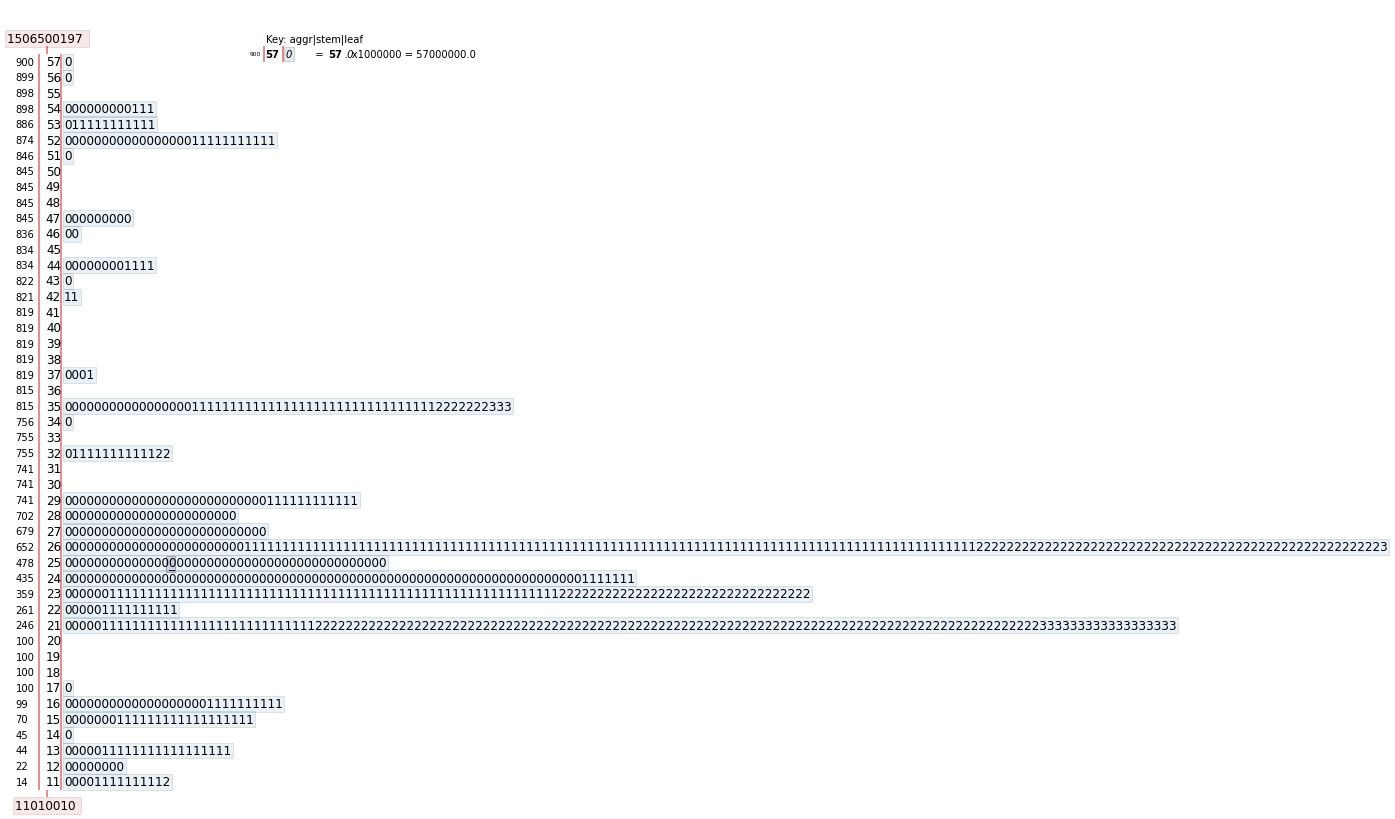

In [ ]:
fig, ax = stemgraphic.stem_graphic(sufx[sufx['file']<1555555555])

In [ ]:
files_dict = {}

In [ ]:
# reading csv files
for i in range(len(files)):
  files_dict[i] =  pd.read_csv(files[i], sep="|")
  files_dict[i]["file"] = nam_files[i]

## Número de observaciones de cada archivo

In [ ]:
nrow = [files_dict[i].shape[0] for i in range(len(files_dict))]

In [ ]:
df_filas = pd.DataFrame({"filas": nrow}) # archivos con número de filas de 1 a 29748
df_filas.describe()

,filas
count,3874.000000
mean,8581.290914
std,7031.344068
min,1.000000
25%,1685.750000
50%,6993.000000
75%,14849.750000
max,29748.000000


In [ ]:
file_ = nam_files[df_filas[df_filas['filas'] == df_filas['filas'].max()].index[0]] # archivo con más observaciones: 29748
file_

'PTPM_CON@23155030.'

## Lectura de archivos

In [ ]:
df = pd.DataFrame({"Fecha": [], "Valor": []})
for k in files_dict.keys():
  df = df.append(files_dict[k]) 

In [ ]:
df2 = df
df2['Fecha'] = pd.to_datetime(df['Fecha'])
[df2.shape, min(df2['Fecha']), max(df2['Fecha'])]

[(33243921, 3),
 Timestamp('1900-01-01 07:00:00'),
 Timestamp('2022-09-30 07:00:00')]

##  Resumiendo archivos: criterio del máximo 'Valor'

In [ ]:
ptpm_max = df2.groupby('Fecha')['Valor'].max()

In [ ]:
[ptpm_max.shape, min(ptpm_max.index), max(ptpm_max.index)]

[(39136,), Timestamp('1900-01-01 07:00:00'), Timestamp('2022-09-30 07:00:00')]

In [ ]:
ptpm_freq = pd.DataFrame({'Valor': ptpm_max.values})
ptpm_freq.groupby('Valor')['Valor'].count()/ptpm_max.shape[0]*100 # 3.6% de los valores son ceros

Valor
0.0      3.605376
0.1      0.033217
0.2      0.071545
0.3      0.061325
0.4      0.015331
           ...   
380.0    0.002555
414.0    0.002555
432.0    0.002555
454.1    0.002555
586.0    0.002555
Name: Valor, Length: 2203, dtype: float64

In [ ]:
import pickle

# Open a file and use dump()
with open('/content/drive/MyDrive/Time_Series_climatic_variebles/ptpm_max.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ptpm_max, file)

In [ ]:
import IPython 
print(IPython.sys_info())
%who_ls

{'commit_hash': '2eec187d3',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/usr/local/lib/python3.8/dist-packages/IPython',
 'ipython_version': '7.9.0',
 'os_name': 'posix',
 'platform': 'Linux-5.10.147+-x86_64-with-glibc2.29',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.8.10 (default, Nov 14 2022, 12:59:47) \n[GCC 9.4.0]'}


['IPython',
 'ax',
 'axes',
 'df',
 'df2',
 'df_filas',
 'f',
 'fig',
 'file',
 'file_',
 'files',
 'files_dict',
 'glob',
 'k',
 'nam_files',
 'np',
 'nrow',
 'os',
 'pcp_col',
 'pd',
 'pickle',
 'plt',
 'ptpm_freq',
 'ptpm_max',
 'ptpm_max2',
 're',
 'stemgraphic',
 'sufx',
 'tmed_col']

In [ ]:
ptpm_max2=ptpm_max.resample('D').first()
#[ptpm_max.head(10), ptpm_max2.head(10)]

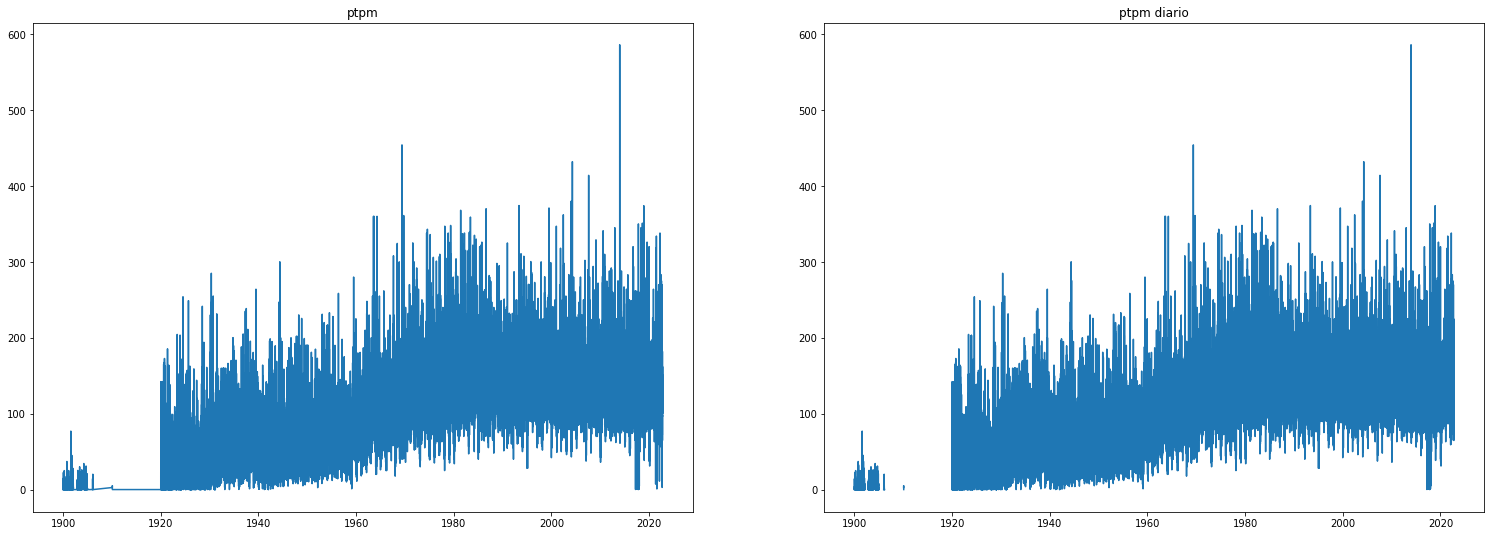

In [ ]:
# grafico
f, axes = plt.subplots(1, 2, figsize = (26,9))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

axes[0].plot(ptpm_max)
axes[0].set_title('ptpm')

axes[1].plot(ptpm_max2)
axes[1].set_title('ptpm diario')

plt.show()